# 高德地图API

## 获取地理编码
- 地理编码/逆地理编码API 是通过 HTTP/HTTPS 协议访问远程服务的接口，提供结构化地址与经纬度之间的相互转化的能力。

In [5]:
import pandas as pd
import requests
map_key ="6c5367f350c2048014880c235b58b90d"

# A-1 地理编码封装函数
def geocode(address,city=None,sig=None)->dict:  #调入函数
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': map_key,
        'address':address,
        'city':city,
        'citylimit':True,
        'output':'json'
    }  #形参
    response = requests.get(url,params=params)
    data = response.json()
    return data  #返回数据

新安小学 = geocode(address='广东省江门市新安小学')
print(新安小学)
df_新安小学地理编码 = pd.json_normalize(新安小学['geocodes'])
display(df_新安小学地理编码)
新安小学地理编码 = 新安小学['geocodes'][0]['location']
print("新安小学地理编码:",新安小学地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省江门市开平市新安小学', 'country': '中国', 'province': '广东省', 'citycode': '0750', 'city': '江门市', 'district': '开平市', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440783', 'street': [], 'number': [], 'location': '112.698960,22.352897', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省江门市开平市新安小学,中国,广东省,0750,江门市,开平市,[],440783,[],[],"112.698960,22.352897",兴趣点,[],[],[],[]


新安小学地理编码: 112.698960,22.352897


In [7]:
geocode('广东省江门市新安小学')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省江门市开平市新安小学',
   'country': '中国',
   'province': '广东省',
   'citycode': '0750',
   'city': '江门市',
   'district': '开平市',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440783',
   'street': [],
   'number': [],
   'location': '112.698960,22.352897',
   'level': '兴趣点'}]}

In [106]:
geocode('广东省江门市松园')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省江门市蓬江区松园村',
   'country': '中国',
   'province': '广东省',
   'citycode': '0750',
   'city': '江门市',
   'district': '蓬江区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440703',
   'street': [],
   'number': [],
   'location': '113.024652,22.608225',
   'level': '村庄'}]}

## 逆地理编码

In [8]:
# A-2 基础逆地理编码分析
# 封装函数
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': map_key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

新安小学逆地理编码 = regeocode(新安小学地理编码)
print(新安小学逆地理编码)
df_新安小学逆地理编码 = pd.json_normalize(新安小学逆地理编码).T
display(df_新安小学逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '江门市', 'province': '广东省', 'adcode': '440783', 'district': '开平市', 'towncode': '440783001000', 'streetNumber': {'number': '43号', 'location': '112.698959,22.3528969', 'direction': '西', 'distance': '0.114271', 'street': '康乐街'}, 'country': '中国', 'township': '三埠街道', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0750'}, 'formatted_address': '广东省江门市开平市三埠街道康乐街43号新安小学'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,江门市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440783
regeocode.addressComponent.district,开平市
regeocode.addressComponent.towncode,440783001000
regeocode.addressComponent.streetNumber.number,43号
regeocode.addressComponent.streetNumber.location,"112.698959,22.3528969"


- 利用地图、街景、GPS定位等，当用户给出一个地点，可以返回该地点的地址以及附近的建筑，同时后台还需要常常更新街景数据来提高目的地辨识度以及搜索精确度

In [9]:
# A-2 Extra 全部逆地理编码分析
新安小学逆地理编码_all = regeocode(新安小学地理编码,extensions="all")
print(新安小学逆地理编码_all)
df_新安小学逆地理编码_all = pd.json_normalize(新安小学逆地理编码_all)
display(df_新安小学逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0750F49F02003898', 'location': '112.699,22.3526', 'direction': '东北', 'name': '西宁路', 'distance': '48.1585'}, {'id': '0750F49F02003834', 'location': '112.7,22.3531', 'direction': '西', 'name': '新市路', 'distance': '87.8803'}, {'id': '0750F49F02003810994', 'location': '112.698,22.3541', 'direction': '东南', 'name': '康乐街', 'distance': '149.347'}], 'roadinters': [{'second_name': '西宁路', 'first_id': '0750F49F02003834', 'second_id': '0750F49F02003898', 'location': '112.699775,22.35313444', 'distance': '87.8803', 'first_name': '新市路', 'direction': '西'}], 'formatted_address': '广东省江门市开平市三埠街道康乐街43号新安小学', 'addressComponent': {'city': '江门市', 'province': '广东省', 'adcode': '440783', 'district': '开平市', 'towncode': '440783001000', 'streetNumber': {'number': '43号', 'location': '112.698959,22.3528969', 'direction': '西', 'distance': '0.114271', 'street': '康乐街'}, 'country': '中国', 'township': '三埠街道', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighb

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0750F49F02003898', 'location': '112.6...","[{'second_name': '西宁路', 'first_id': '0750F49F0...",广东省江门市开平市三埠街道康乐街43号新安小学,江门市,广东省,440783,开平市,...,中国,三埠街道,[[]],[],[],[],[],0750,"[{'area': '5676.270626', 'type': '141203', 'id...","[{'id': 'B02EE00285', 'direction': '北', 'busin..."


In [10]:
# A-3 分析细节
roads = pd.json_normalize(新安小学逆地理编码_all['regeocode']['roads'])
roadinters = pd.json_normalize(新安小学逆地理编码_all['regeocode']['roadinters'])
aois = pd.json_normalize(新安小学逆地理编码_all['regeocode']['aois'])
pois = pd.json_normalize(新安小学逆地理编码_all['regeocode']['pois'])
display(roads,roadinters,aois,pois)

,id,location,direction,name,distance
0,0750F49F02003898,"112.699,22.3526",东北,西宁路,48.1585
1,0750F49F02003834,"112.7,22.3531",西,新市路,87.8803
2,0750F49F02003810994,"112.698,22.3541",东南,康乐街,149.347


,second_name,first_id,second_id,location,distance,first_name,direction
0,西宁路,0750F49F02003834,0750F49F02003898,"112.699775,22.35313444",87.8803,新市路,西


,area,type,id,location,adcode,name,distance
0,5676.270626,141203,B02EE00285,"112.698883,22.353172",440783,新安小学,0
1,2677.979925,141204,B02EE0OILF,"112.698193,22.352598",440783,商业幼儿园(西宁路),44.5378


,id,direction,businessarea,address,poiweight,name,location,distance,tel,type
0,B02EE00285,北,[],三埠新昌康乐街43号,0.342318,新安小学,"112.698883,22.353172",31.5873,0750-2286348,科教文化服务;学校;小学
1,B02EE0OILF,西南,[],西宁路85号,0.346889,商业幼儿园(西宁路),"112.698248,22.352538",83.3894,0750-2218713,科教文化服务;学校;幼儿园
2,B02EE0OHXP,北,[],新昌新市路2号,0.086263,开平市经济和信息化局,"112.699444,22.354068",139.412,[],政府机构及社会团体;政府机关;区县级政府及事业单位
3,B02EE0OXOH,东北,[],西宁路80号附近,0.3414,松园,"112.699882,22.353779",136.412,[],商务住宅;住宅区;住宅小区
4,B02EE0OHWC,东北,[],康乐街与新市路交叉口南100米,0.187806,开平市口岸局,"112.699461,22.353921",125.005,[],政府机构及社会团体;政府机关;区县级政府及事业单位
5,BZ7HP2009T,东,[],开平市,0.187277,迳头桥,"112.699782,22.353081",86.9776,[],地名地址信息;交通地名;桥
6,B02EE0OH96,北,[],新昌市场,0.259508,中国邮政储蓄银行(新昌支行),"112.698262,22.355453",293.165,0750-2635095,金融保险服务;银行;中国邮政储蓄银行
7,B02EE027IZ,南,[],三埠新昌迳头思堤路3号,0.26207,永安大厦(思堤路),"112.698802,22.350303",288.898,[],商务住宅;楼宇;商务写字楼
8,B02EE0OHFF,西北,[],新昌路18号,0.209674,广东农信开平农村信用社(三埠信用社),"112.697512,22.355275",303.49,0750-2215321,金融保险服务;银行;农村商业银行
9,B02EE0OH6I,北,[],新昌路2号之1-2号,0.257744,中国银行(新昌中路支行),"112.699142,22.355816",325.15,[],金融保险服务;银行;中国银行


## 路径规划
- 路径规划API是一套以HTTP形式提供的步行、公交、驾车查询及行驶距离计算接口，返回JSON 或 XML格式的查询数据，用于实现路径规划功能的开发。 
- 根据两点坐标，利用算法程序算出用时最便利的出行路线

In [126]:
# B-1 准备base url、params、response.json（） 
# 封装函数
def walking(origin:str,destination:str)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':map_key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [8]:
# B-2 准备walking 参数
西宁路80号 = geocode('广东省江门市西宁路80号')
西宁路80号_location = 西宁路80号['geocodes'][0]['location']
新安小学_location = 新安小学['geocodes'][0]['location']
print("(起点)新安小学_location:",新安小学_location,"(终点)西宁路80号_location:",西宁路80号_location)

(起点)新安小学_location: 112.698960,22.352897 (终点)西宁路80号_location: 112.700254,22.354301


In [133]:
# B-3 路径规划
新安小学_西宁路80号 = walking(新安小学_location,西宁路80号_location)
df_步行路径规划 = pd.json_normalize(新安小学_西宁路80号["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,沿西宁路向东北步行212米左转,东北,西宁路,212,170,"112.699041,22.352756;112.699774,22.353129;112....",左转,[],0
1,向西北步行27米到达目的地,西北,[],27,22,"112.70076,22.353815;112.700755,22.353902;112.7...",[],到达目的地,0


0    沿西宁路向东北步行212米左转
1      向西北步行27米到达目的地
Name: instruction, dtype: object

## 行政区域查询（代码D）
- 行政区域查询是一类简单的HTTP接口，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。
- 要实现这个功能首先要连接上全国行政区域的数据库，结合搜索引擎来调用并返回用户所需要的数据

In [153]:
# D-1 请注意行政区域级别划分参数
# 封装函数
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':map_key,
        'keywords':keywords,
        'subdistrict':"3",
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='广东',extensions='all',subdistrict='3')

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])
df_行政区域_2级_江门市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
df_行政区域_3级_开平市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'][6]['districts'])

display(df_行政区域_1级,df_行政区域_2级_江门市,df_行政区域_3级_开平市)

,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


,citycode,adcode,name,center,level,districts
0,0750,440784,鹤山市,"112.961795,22.768104",district,"[{'citycode': '0750', 'adcode': '440784', 'nam..."
1,0750,440783,开平市,"112.692262,22.366286",district,"[{'citycode': '0750', 'adcode': '440783', 'nam..."
2,0750,440704,江海区,"113.120601,22.572211",district,"[{'citycode': '0750', 'adcode': '440704', 'nam..."
3,0750,440781,台山市,"112.793414,22.250713",district,"[{'citycode': '0750', 'adcode': '440781', 'nam..."
4,0750,440785,恩平市,"112.314051,22.182956",district,"[{'citycode': '0750', 'adcode': '440785', 'nam..."
5,0750,440705,新会区,"113.038584,22.520247",district,"[{'citycode': '0750', 'adcode': '440705', 'nam..."
6,0750,440703,蓬江区,"113.07859,22.59677",district,"[{'citycode': '0750', 'adcode': '440703', 'nam..."


,citycode,adcode,name,center,level,districts
0,0750,440703,棠下镇,"113.007,22.6942",street,[]
1,0750,440703,潮连街道,"113.109,22.6529",street,[]
2,0750,440703,荷塘镇,"113.111,22.6507",street,[]
3,0750,440703,杜阮镇,"112.967,22.6048",street,[]
4,0750,440703,环市街道,"113.074,22.636",street,[]
5,0750,440703,白沙街道,"113.082,22.5967",street,[]


## 搜索POI
- 搜索服务API是一类简单的HTTP接口，提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。
- 要先收集各类服务商的地址，形成一个庞大可供调用的数据库，配合关键字搜索返回与关键词相符的数据

In [168]:
# 封装函数
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':map_key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

广东_喜茶 = place_text('喜茶','餐饮服务',city="广东省",children=1,extensions='all')
广东_喜茶

{'status': '1',
 'count': '82',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFK712FX',
   'parent': 'B0FFF5RJ1U',
   'childtype': '202',
   'name': '喜茶(凯华国际DP店)',
   'tag': '多肉葡萄,芝芝桃桃,芝芝莓莓,芝芝芒芒,波波茶,波波冰淇淋,满杯红柚,芝芝莓果,双拼波波茶,黑糖波波,阿华田波波冰系列,满杯水果绿,芝士金凤,多肉莓莓,鲜奶翠玉抹茶,多肉芒芒甘露,阿华田波波冰,阿华田咖啡冰,咖啡波波双拼,喜茶咖啡,多肉粉荔,茶王冰淇淋,芋泥波波茶2,芝士绿妍,芒芒冰淇凌',
   'type': '餐饮服务;冷饮店;冷饮店',
   'typecode': '050700',
   'biz_type': 'diner',
   'address': '冼村路5号104房近K11凯华国际中心',
   'location': '113.327219,23.117334',
   'tel': '020-85208628',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '020',
   'cityname': '广州市',
   'adcode': '440106',
   'adname': '天河区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3413524600',
   'distance': [],
   'navi_poiid': [],
   'entr_location': '113.327257,23.117611',
   'business_area': '珠江新城',
   'exit_location': [],
   'match': '0',


In [169]:
df_广东_喜茶 = pd.json_normalize(广东_喜茶["pois"])
display(df_广东_喜茶)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFK712FX,B0FFF5RJ1U,202,喜茶(凯华国际DP店),"多肉葡萄,芝芝桃桃,芝芝莓莓,芝芝芒芒,波波茶,波波冰淇淋,满杯红柚,芝芝莓果,双拼波波茶,...",餐饮服务;冷饮店;冷饮店,050700,diner,冼村路5号104房近K11凯华国际中心,"113.327219,23.117334",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,28.00,0
1,B0FFK7127Y,B02F38PFKU,202,喜茶(蛇口网谷GO店),"满杯红柚,多肉葡萄,波波茶,芒芒冰淇凌,芝芝莓果,芝芝桃桃,芋泥波波,酸奶杯,多肉芒芒甘露,...",餐饮服务;冷饮店;冷饮店,050700,diner,南海大道1057号科技大厦2期B栋103房,"113.918523,22.494681",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,29.00,0
2,B0FFK7122K,[],[],喜茶(园岭星光广场GO店),"多肉葡萄,波波茶,芝芝桃桃,芝芝莓莓,芝芝芒芒,芝芝莓果,多肉芒芒甘露,阿华田波波冰,黑糖波...",餐饮服务;冷饮店;冷饮店,050700,diner,红岭中路2061号园岭花园裙楼1楼1010号铺,"114.104188,22.555112",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.0,28.00,0
3,B0FFK711WJ,B0FFGDDLUB,202,喜茶(盈峰中心GO店),"波波茶,多肉葡萄,芝芝莓莓,芝芝桃桃,芋泥波波茶2,MINI喜茶,多肉芒芒甘露,芋泥紫米茶,...",餐饮服务;冷饮店;冷饮店,050700,diner,盈峰中心1层108室,"113.939499,22.522579",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,27.00,0
4,B0FFK711S0,[],[],喜茶(丰盛町GO店),"芝芝桃桃,波波茶,多肉葡萄,芝芝莓莓,芝芝芒芒,满杯红柚,阿华田波波冰,芋泥波波茶2,芝芝桃...",餐饮服务;冷饮店;冷饮店,050700,diner,"车公庙丰盛町地下阳光街BCD区C1-089,C1-091,C1-093B","114.024776,22.535568",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,28.00,0
5,B0FFK711LW,[],[],喜茶(中科纳能GO店),"芝芝桃桃,波波茶,多肉葡萄,爆芋泥波波冰,芝芝莓果,小芋头条,多肉芒芒甘露,多肉粉荔,芋泥波...",餐饮服务;冷饮店;冷饮店,050700,diner,粤兴六道中科纳能大厦B座1层B02,"113.941148,22.526739",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,28.00,0
6,B0FFK711G1,B02F300988,202,喜茶(紫荆城GO店),[],餐饮服务;冷饮店;冷饮店|购物服务;购物相关场所;购物相关场所,050700|060000,diner,振兴路55号紫荆城商业广场1层A16号,"114.088713,22.546379",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,7.00,0
7,B0FFK7117H,[],[],喜茶(海上世界店),"多肉葡萄,波波茶,芝芝莓莓,芝芝桃桃,芋泥波波茶,黑糖波波,芝芝芒芒,满杯红柚,喜茶咖啡,波...",餐饮服务;冷饮店;冷饮店,050700,diner,海滨花园商业中心1栋103铺海上世界A出口KFC旁,"113.915632,22.484082",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,29.00,0
8,B0FFK71106,B0FFFZRC7K,201,喜茶(深圳机场GO店),"多肉葡萄,芝芝莓莓,波波茶,芝芝桃桃,芝芝芒芒,芝士金凤,满杯红柚,芋头条,多肉芒芒甘露,芋...",餐饮服务;冷饮店;冷饮店,050700,diner,宝安国际机场航站楼3S-08-01近23号登机口,"113.811463,22.628429",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",B0FFFZRC7K,3,3F,TY0001130210301613,4.5,30.00,0
9,B0FFK710VQ,B0FFJ6C1YS,202,喜茶(深圳湾GO店),"芝芝桃桃,阿华田波波冰,双拼波波茶,多肉葡萄,波波茶,布甸波波冰,芝芝莓果,芋头条,满杯红柚...",餐饮服务;冷饮店;冷饮店,050700,diner,高新南九道10号深圳湾科技生态园3区10栋裙楼01层33-34号,"113.951604,22.530259",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,28.00,0


## 周边搜索 
- 可能会用到计算机视觉功能，在确定一个目的地后，通过对该地点周边街景图的分析，可以找到附近的建筑物

In [171]:
# 封装函数
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':map_key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# F-2 json信息
新安小学_周边POI = place_around(新安小学_location)
新安小学_周边POI

{'status': '1',
 'count': '881',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B02EE0OXOH',
   'parent': [],
   'childtype': [],
   'name': '松园',
   'type': '商务住宅;住宅区;住宅小区',
   'typecode': '120302',
   'biz_type': [],
   'address': '西宁路80号附近',
   'location': '112.699882,22.353779',
   'tel': [],
   'distance': '136',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFLAEPJU',
   'parent': [],
   'childtype': [],
   'name': '包蔓轩',
   'type': '餐饮服务;快餐厅;快餐厅',
   'typecode': '050300',
   'biz_type': 'diner',
   'address': '新迳路58号首层位',
   'location': '112.699852,22.351446',
   'tel': [],
   'distance': '185',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFI8MDXV',
   'parent': [],
   'childtype': [],
   'name': '佳客莱饮食店',
   'type': '餐饮服务;中餐厅;中餐厅',
   'typecode': '050100',
   'biz_

In [172]:
# F-3 表格化，可扩展pandas处理
df_新安小学_周边POI = pd.json_normalize(新安小学_周边POI['pois'])
df_新安小学_周边POI

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B02EE0OXOH,[],[],松园,商务住宅;住宅区;住宅小区,120302,[],西宁路80号附近,"112.699882,22.353779",[],136,[],[],[],0,[],[]
1,B0FFLAEPJU,[],[],包蔓轩,餐饮服务;快餐厅;快餐厅,050300,diner,新迳路58号首层位,"112.699852,22.351446",[],185,[],[],[],0,[],[]
2,B0FFI8MDXV,[],[],佳客莱饮食店,餐饮服务;中餐厅;中餐厅,050100,diner,新迳路58号,"112.699717,22.351353",[],188,[],[],[],0,[],[]
3,B0FFLFK33A,[],[],炸炸,餐饮服务;中餐厅;中餐厅,050100,diner,[],"112.699941,22.354333",[],189,[],[],[],0,[],[]
4,B0FFL6Q8VG,[],[],聚食与乐,餐饮服务;中餐厅;中餐厅,050100,diner,新迳路53号西北90米,"112.699751,22.351361",[],189,[],[],[],0,[],[]
5,B0FFH1CNWG,[],[],嘉士利住宅安全文明区,商务住宅;商务住宅相关;商务住宅相关,120000,[],南安路与新迳路交叉口西50米,"112.699696,22.351319",[],191,[],[],[],0,[],[]
6,B02EE0OHRL,[],[],日康盲人按摩所,生活服务;洗浴推拿场所;洗浴推拿场所,071400,[],康乐街与新市路交叉口西北50米,"112.699377,22.354577",[],191,[],[],[],0,[],[]
7,B0FFLFIFUN,[],[],锦味美食店,餐饮服务;餐饮相关场所;餐饮相关,050000,diner,新市路16号商业新村119号,"112.699374,22.354599",[],194,[],[],[],0,[],[]
8,B0FFGL6BUD,[],[],荣记美食,餐饮服务;餐饮相关场所;餐饮相关,050000,diner,三埠街道思堤路1号首层,"112.699621,22.351259",13702991752,194,[],[],[],0,[],[]
9,B0FFKDNBEQ,[],[],旺记点心,餐饮服务;快餐厅;快餐厅,050300,diner,新迳路53号西北70米,"112.699584,22.351230",[],196,[],[],[],0,[],[]


## IP定位
- IP定位是一个简单的HTTP接口，根据用户输入的IP地址，能够快速的帮用户定位IP的所在位置。
- 利用GPS定位技术和物联网技术，将电子设备发出的信号连接到网络上，从而获得定位信息

In [205]:
# 封装函数
def ip(ip:str)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':map_key,
        'ip':ip,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    del data['status']
    del data['info']
    df = ['省份:%s'%(data['province']),'地区:%s'%(data['city']),'地理编码:%s'%(data['adcode']),'经纬度:%s'%(data['rectangle'])]
    print('ip:'+ip)
    for i in df:
        print(i)
    return 

In [206]:
ip('223.73.158.154')

ip:223.73.158.154
省份:广东省
地区:深圳市
地理编码:440300
经纬度:113.9629412,22.4627142;114.2106056,22.61394155


## 批量请求接口
- 批量接口通过用户传入合并后的请求，同时返回多个请求的顺序集合，目前最多支持20个子请求。 返回的顺序与子请求的顺序一致。

In [39]:
#def ip(ip:str)->dict:
# 封装函数
params={
    'key':map_key,
    }
#POST的body体之中内容示例
body = {
    'ops':[
        {
            'url':'/v3/place/around?offset=10&page=1&key=6c5367f350c2048014880c235b58b90d&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000'
        },
        {
            'url':'/v3/place/around?offset=10&page=1&key=6c5367f350c2048014880c235b58b90d&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000'
        }
    ]
}
response = requests.get('https://restapi.amap.com/v3/batch?',params=params,json=body)
data = response.json()
data

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

## 静态地图
- 静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形。
- 要用到信息可视化及计算机视觉的功能，在确定目标地址后，通过图像方式以适当的比例尺、图例等来呈现可视化地图

In [193]:
>>> from PIL import Image
>>> from io import BytesIO

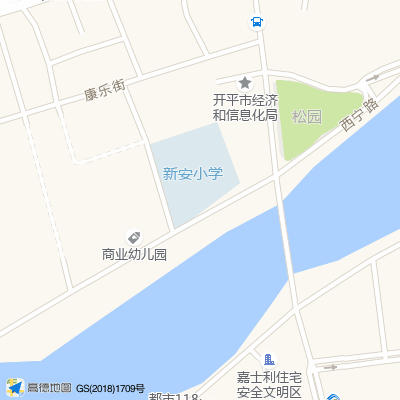

In [195]:
from PIL import Image
from io import BytesIO
# 封装函数
def map(location,zoom:str)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':map_key,
        'location':location,
        'zoom':zoom,
 }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

map(location=新安小学_location,zoom=16)

## 天气查询
- 天气查询是一个简单的HTTP接口，根据用户输入的adcode，查询目标区域当前/未来的天气情况。
- 用一个可以自动更新数据的数据库与气象台数据库连接起来，实现各地天气情况最快最准确地被调用

In [196]:
# 封装函数
def weather(city,extension='base')->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':map_key,
        'city':city,
        'output':'json'
 }
    response = requests.get(url,params=params)
    data = response.json()
    return data

江门_天气 = weather(city ='江门市',extension='all')
江门_天气

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '江门市',
   'adcode': '440700',
   'weather': '多云',
   'temperature': '24',
   'winddirection': '南',
   'windpower': '≤3',
   'humidity': '100',
   'reporttime': '2020-04-19 22:52:41'}]}

## 坐标转换
- 坐标转换是一类简单的HTTP接口，能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。

In [210]:
# 封装函数
def assistant(locations,coordsys:str,extension='all')->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':map_key,
        'locations':locations,
        'coordsys':coordsys,
        'output':'json'
 }
    response = requests.get(url,params=params)
    data = response.json()
    return data

assistant('116.481499,39.990475|116.481499,39.990375','gps')

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '116.487585177952,39.991754014757;116.487585177952,39.991653917101'}

## 输入提示
- 输入提示是一类简单的HTTP接口，提供根据用户输入的关键词查询返回建议列表。

In [217]:
# 封装函数
def assistant(keywords,city:str,extension='all')->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':map_key,
        'keywords':keywords,
        'city':city,
        'output':'json'
 }
    response = requests.get(url,params=params)
    data = response.json()
    return data

提示 = assistant(keywords='瑞幸',city='江门市',extension='all')
提示

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B0FFIJRNNI',
   'name': '幸福瑞杂商店',
   'district': '广东省江门市蓬江区',
   'adcode': '440703',
   'location': '113.070900,22.585410',
   'address': '幸福路14号附近',
   'typecode': '060400',
   'city': []},
  {'id': 'B02EE0P0P9',
   'name': '瑞兴夹板',
   'district': '广东省江门市新会区',
   'adcode': '440705',
   'location': '113.049348,22.521314',
   'address': '东庆北路30-204号',
   'typecode': '060603',
   'city': []},
  {'id': 'B0FFGDJ4H6',
   'name': '瑞兴花园(东门路)',
   'district': '广东省江门市新会区',
   'adcode': '440705',
   'location': '113.04566,22.52869',
   'address': '冈州大道中6号3座附近',
   'typecode': '120302',
   'city': []},
  {'id': 'B02EE01KL0',
   'name': '瑞兴不锈钢制品有限公司',
   'district': '广东省江门市新会区',
   'adcode': '440705',
   'location': '112.851127,22.511861',
   'address': '163县道东50米',
   'typecode': '170200',
   'city': []},
  {'id': 'B02EE01FUX',
   'name': '瑞兴',
   'district': '广东省江门市台山市',
   'adcode': '440781',
   'location': '1

## 交通态势
- 交通态势是一类简单的HTTP接口，提供根据用户输入的内容能够返回希望查询的交通态势情况。

In [38]:
# 封装函数
def traffic(level,rectangle:str,extension='all')->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':map_key,
        'rectangle':rectangle,
        'level':level,
        'output':'json'
 }
    response = requests.get(url,params=params)
    data = response.json()
    return data

交通 = traffic(level='5',rectangle='116.351147,39.966309;116.357134,39.968727')
交通

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

## 地理围栏
- 地理围栏服务是一类HTTP接口，提供在服务端，增删改查地理围栏的功能，同时支持对于设备与围栏关系进行监控。
- 创建围栏（post请求）

In [40]:
# 封装函数
url = 'https://restapi.amap.com/v4/geofence/meta?'
query = {
    'key':map_key,
}
#将json参数添加到body体中发送，请求json参数：
body={
    'name':'weilan01',
    'center':'112.700254,22.354301',
    'radius':'1000',
    'enable':'true',
    'valid_time ':'2020-5-1',
    'repeat':'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time':'00:00,11:59;13:00,20:59',
    'desc':'测试围栏描述',
    'alert_condition':'enter;leave'
    }
response = requests.post(url,params=query,json=body)
r = response.json()#返回数据

In [41]:
response.status_code   #返回状态码

200

In [29]:
r = response.json()
r

{'data': {'gid': '36c07b27-27ec-475e-8eca-8d20e585e1de',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 轨迹纠偏
- 根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。
- 此服务为POST请求方式

In [42]:
# 封装函数
#请求参数key需要置于queryString之中

params={
    'key':map_key,
    }

#业务参数需要置于body体之中
body = [{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
}, {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]
response = requests.get('https://restapi.amap.com/v4/grasproad/driving',params=params,json=body)
data = response.json()
data

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 设计应用：周边拼单服务类APP
- 概念：在各大商圈、美食街甚至办公楼附近，开展外送或拼车等拼单业务，进而降低运输成本或提高运送效率。
- 涉及的API功能：
  1. 静态地图、路径规划：
     - 用户发出的拼单拼车需求可以在地图上显示，后台人员根据地图信息制定路线规划方案。如同一小区的住户在购买同一家超市的商品时，可以选择拼单以节省运费。
  2. 天气查询：
     -  后台根据当天天气情况来预测到达时间，如下雨天可善意提醒客户送达时间可能稍有延迟。
  3. 轨迹纠偏、交通态势：
     - 当后台发现正在执行业务的骑手绕了远路或即将到达堵塞路段时，可及时提醒。
  4. 搜索POI、周边搜索、IP定位：
     - 用户可以实时监测自己以及骑手现在所在的位置，骑手也可以根据周边建筑快速找到用户。
  5. 地理围栏、批量请求接口：
     - 当获取到有用户在发起拼单拼车需求时，后台可以向附近且正在浏览这一APP的用户发送邀请加入拼单的信息。